# Unsupervised Machine Learning Project - Customer Segmentation


### by: Valentina Angelovska

___________________________

## Project Overview:

The Wholesale Customers dataset from the UCI Machine Learning Repository is used for analyzing customer segments based on annual spending on diverse product categories. This dataset is valuable for performing customer segmentation, which can help businesses tailor their marketing strategies, optimize inventory, and enhance customer satisfaction.

Link of dataset: https://archive.ics.uci.edu/dataset/292/wholesale+customers

## About Dataset:

The dataset consists of 440 instances and includes the following features:

- `Channel:` Integer value representing the customer channel (1 for Horeca (Hotel/Restaurant/Cafe) and 2 for Retail).
- `Region:` Integer value representing the customer region (1 for Lisbon, 2 for Oporto, and 3 for Other).
- `Fresh:` Annual spending (m.u.) on fresh products.
- `Milk:` Annual spending (m.u.) on milk products.
- `Grocery:` Annual spending (m.u.) on grocery products.
- `Frozen:` Annual spending (m.u.) on frozen products.
- `Detergents_Paper:` Annual spending (m.u.) on detergents and paper products.
- `Delicassen:` Annual spending (m.u.) on delicatessen products.



## Load Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
from tqdm import tqdm
from summarytools import dfSummary
import vpython as vp

# Visualization libraries
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

# Pretty display for notebooks
%matplotlib inline

# Hyperoarameter Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler

# Unsupervised Learning models / Clustering
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Unsupervised Learning models / Clustering metrics
from sklearn.metrics import silhouette_score
from sklearn import metrics

# Dataset library
from ucimlrepo import fetch_ucirepo 

SEED=42
random.seed(SEED)
np.random.seed(SEED)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

## Load Dataset

In [2]:
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

# Display dataset
display(X.head())
display(y.head())

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


,Region
0,3
1,3
2,3
3,3
4,3


### Project Scope

For this project, the target variable will not be used as the focus is on unsupervised machine learning techniques. Since the objective is to perform clustering and analyze customer segments without relying on predefined labels, the target variable is not necessary.

## Data Analysis

In [3]:
# Shape of dataset
print(f'This dataset have {X.shape[0]} instances, and {X.shape[1]} features')

This dataset have 440 instances, and 7 features


In [4]:
# Very good function that shows all of the basic analysis of dataset
dfSummary(X)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Channel[int64],Mean (sd) : 1.3 (0.5)min < med < max:1.0 < 1.0 < 2.0IQR (CV) : 1.0 (2.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABf0lEQVR4nO3cQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouuumUGNU2g+eZ535yeIlYTZ/HYahwH/38tcvAGPMrj1Qa12WUuYT538Ow3CceBa+/RpqrXW5Xq9fu65bTRl+OBzea61vYuVe176o867rVtvt9tj3/emWwa21xW63W+33+3kpRajc5eqvv5RS+r4/bTabjwnzlxPOwA8uU0QQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhFH7UWGMZ67RFyoP8ew1+kLlUZ66Rl+oPNSz1ui7TBFBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESoRRS9Jaa4tbB7fWFufzeVZK6WqtN78YcbrL5TKb2sq1Z74A9IlOfRg+eJMAAAAASUVORK5CYII="">",0(0.0%)
2,Fresh[int64],Mean (sd) : 12000.3 (12647.3)min < med < max:3.0 < 8504.0 < 112151.0IQR (CV) : 13806.0 (0.9),433 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACLUlEQVR4nO3dz6raQBiG8W/iUeLRJoigOzfdd+HSi+jFdtu9d9G9CHKMmB6rTNNNLYX+0cxgm3d4fmtnVHiICfgxrmkaA7ou+98fALjH060XOOeGZjYI3P/cNM1r4Frgh7+G6pwbTqfT90VRTEI2PxwOL865D8SKWLeuqIOiKCar1eq1LMtTm42rqsrX6/Vkt9sNzIxQEeXmT7+ZWVmWp9ls9jlg/2HAGuAXPExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCwl2HTYTy3vfNrHDOhW7BOVUwsweGWtd1/3K5vFssFr1er9fq6J8rzqnC1cNCPZ/PT3mePy+Xy9N8Pn9pu55zqvCzh/70m5mNRqPQM6rMOKcK3/EwBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgkP/5tfjMgJAaYDEtLZUGMnBJgOSEtnQ42ZEGA6ID2dDfUqYkKA6YCE8DAFCZ2/ooZiVDstSYbKqHZ6kgyVUe30JBnqVcyotve+sPBbh8zMvoYsNG45fuuuUKuqyttufDweczOzuq7z7Xb7/C/Xx773ZrN5E3rr4L3v13X9djwef8qy7NL2vff7/dE599HMgm5ZhH1pmuaP3/kbaPbah9S3ZScAAAAASUVORK5CYII="">",0(0.0%)
3,Milk[int64],Mean (sd) : 5796.3 (7380.4)min < med < max:55.0 < 3627.0 < 73498.0IQR (CV) : 5657.2 (0.8),421 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACJklEQVR4nO3avY7aQBSG4TP8ySzIFiIyHc32W1ByEbnYbVMi+S5yA0gWjIXXBORMujRRwjIGhW/3fWrO0Qi9sgUaF0Iw4NH1/vcBgPcYXPqAc25sZqPI/acQQhM5C/z2z1Cdc+P5fP41TdNZzPKqqnbOuVdiRVeXnqijNE1n6/W6ybLseM1i731SFMWsLMuRmREqOrn46jczy7LsmOf5W8T+ccQM8Ad+TEECoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoUICoULC4J7L27YdmlnqnItdcQohNDc8EkTdLdS6rofn8/lluVz2+/3+MWZHVVU759wrseJuoZ5Op0GSJE+r1eq4WCx2185775OiKGZlWY7MjFA/ubu++s3MJpPJMc/zt8jx8U0PA1n8mIIEQoUEQoUEQoUEQoUEQoUEQoUEQoWEu//h30XHuwLcE/hAHjbUrncFuCfwsTxsqF3uCnjvk81mk5dl+cU5V0UeoWdmPyNneZrf2LtC9d4n1y4+HA6JmVld18l2u32KnY/RNE2np3HbtsO6rp+n0+n3Xq93vnZ+v98fnHPfzCzq1tgn9SOE8Nfv6xduU54Fcg8FfAAAAABJRU5ErkJggg=="">",0(0.0%)
4,Grocery[int64],Mean (sd) : 7951.3 (9503.2)min < med < max:3.0 < 4755.5 < 92780.0IQR (CV) : 8502.8 (0.8),430 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIUlEQVR4nO3dsY7aQBRG4TthlwwQ2SAS09HSpaDkIfKw+xBueQ8kg2zhNQtCkyppogQYh4Tfe76aGVwc2bKvJbsQggGP7sP/PgDgGk+XfuCcG5hZP3L/YwihiVwL/PTHUJ1zg+l0+i1JkknM5lVV7ZxzL8SKti6dUftJkkxWq1WTpunhlo3LsvR5nk+KouibGaGilYuXfjOzNE0PWZa9Ruw/iFgD/IKbKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEi46uvSsc7n87OZJc652C2OIQQ+oY77hVrX9fPpdPo6n897vV7vELNHVVU759wLseJuoR6Pxyfv/XC5XB5ms9nu1vVlWfo8zydFUfTNjFDfubte+s3MR

In [5]:
# Info about X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [6]:
# Summary Statistics of dataset
X.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# Checking again for missing values
X.isna().sum().sum()

0

## Conclusion of Data Analysis


- **Features and Instances:**
    - There are 440 instances and 7 features.
    
- **Missing Values:**
    - There are no missing values in this dataset.

- **Duplicates:**
    - There are no duplicates in this dataset (from dfSummary)
    
- **Data Types:**
    - This dataset is primarily numerical. The Channel feature is categorical, as it contains only two unique values (1 and 2). The remaining features are integers with a wide range of values.
    
- **Summary Statistics:**
    - Analyzing the summary statistics of the dataset reveals that none of the features have a standard deviation of zero, indicating variability in all features. However, the standard deviations are quite high, suggesting that the data points are widely dispersed. Additionally, the graphs above confirm that the data distribution is skewed.

## Exploratory Data Analysis

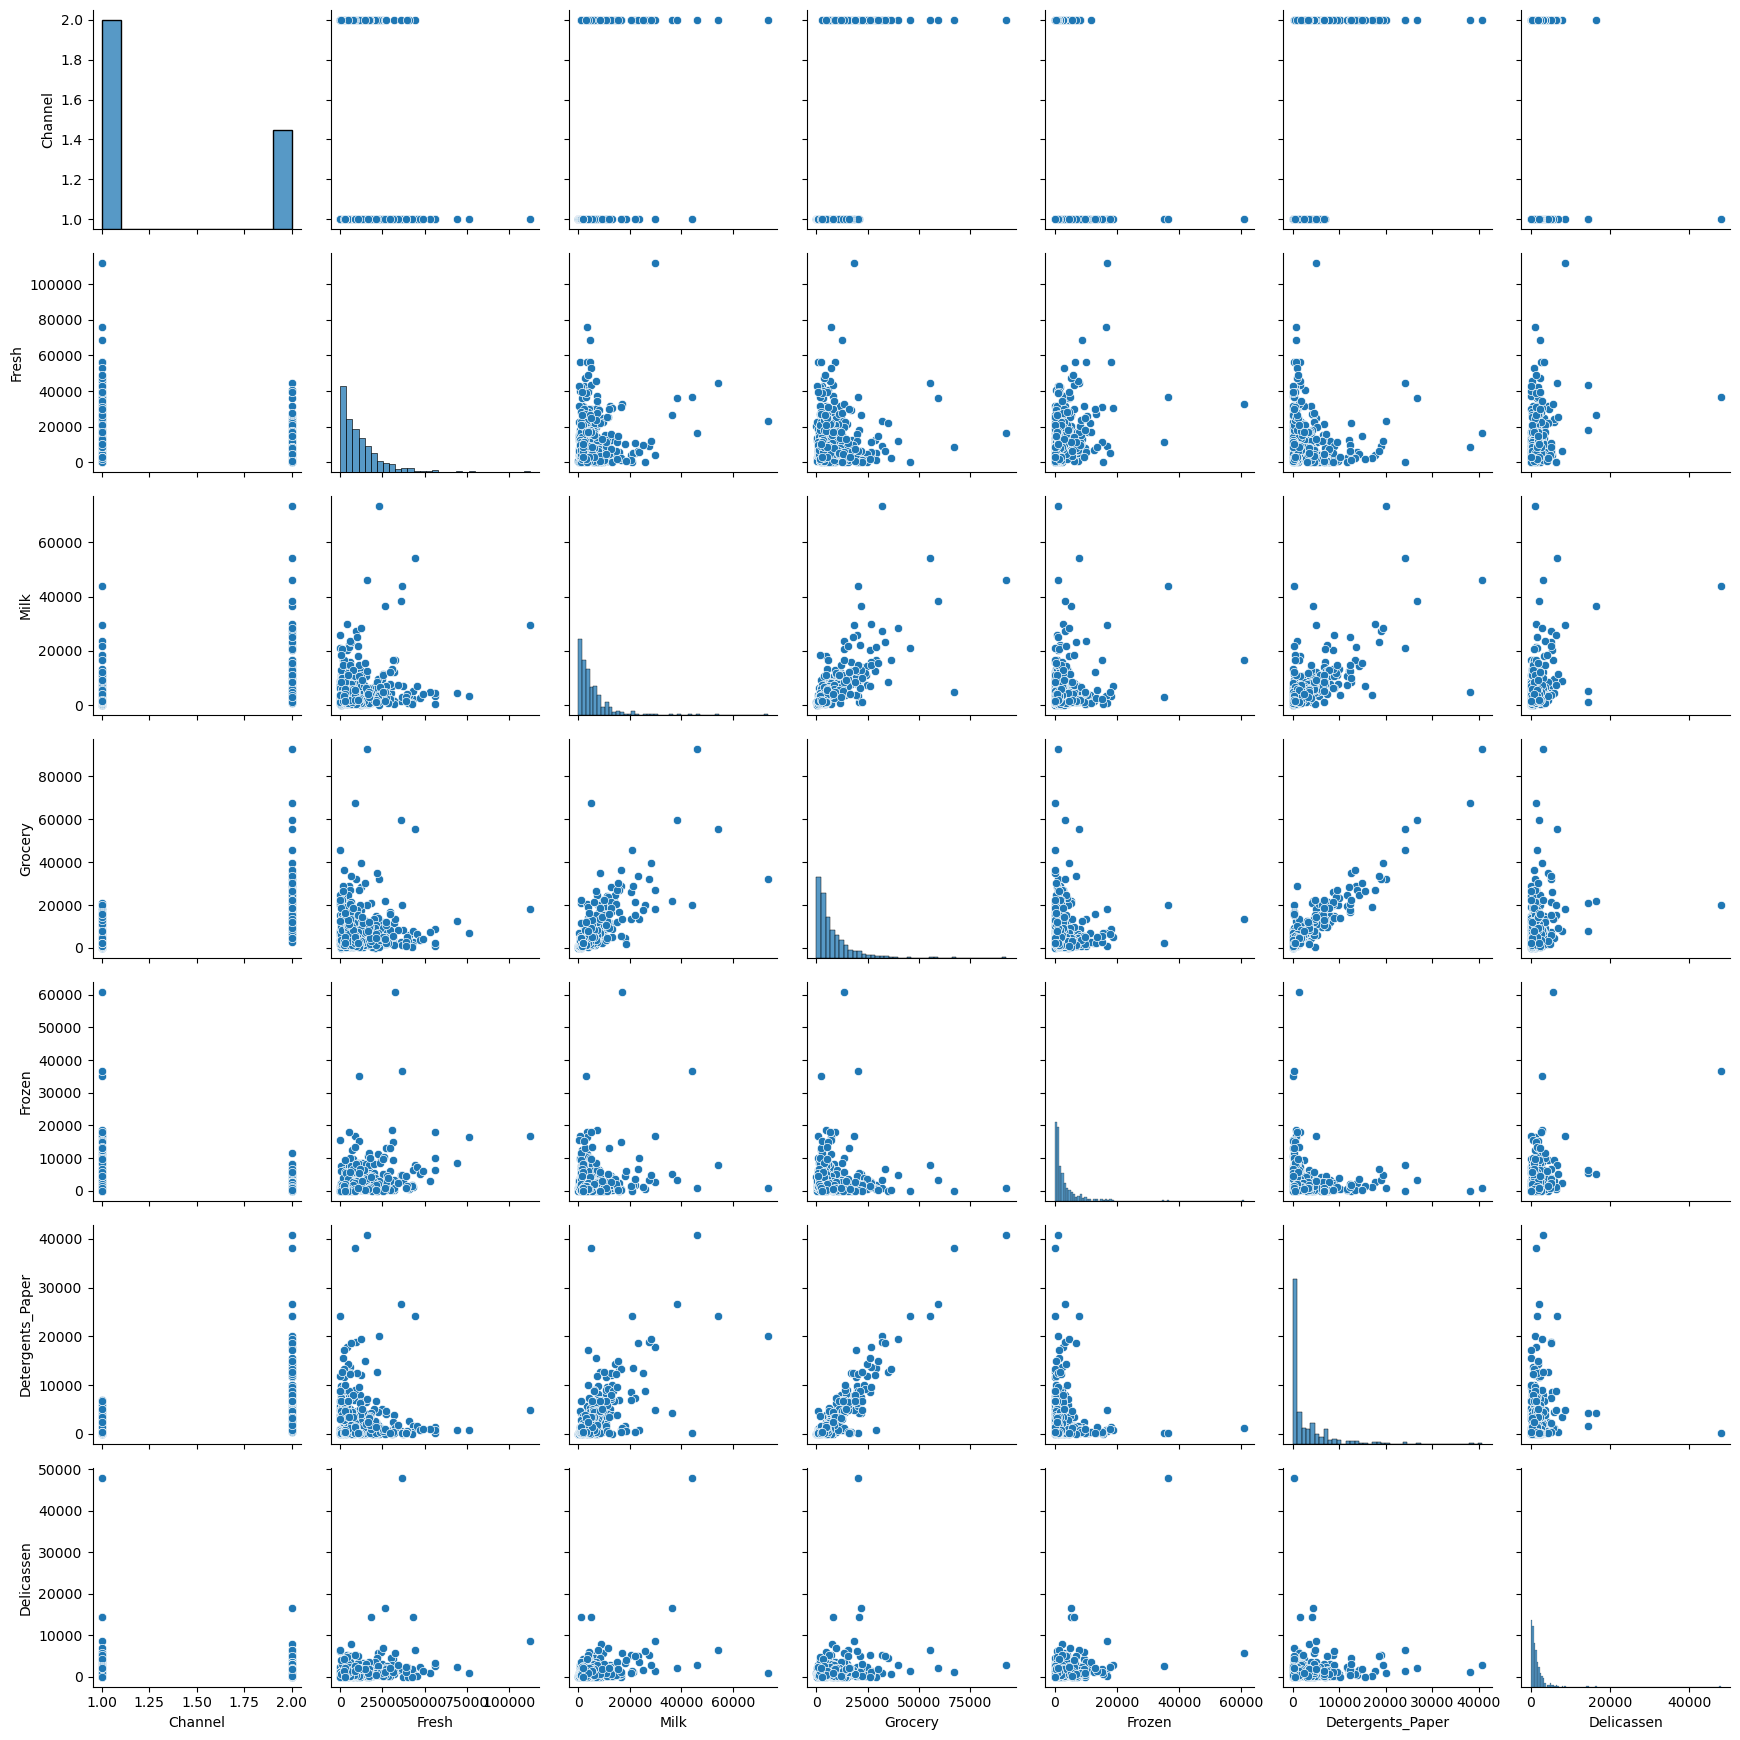

In [8]:
# Pairplot

sns.pairplot(X)
plt.tight_layout()
plt.show()

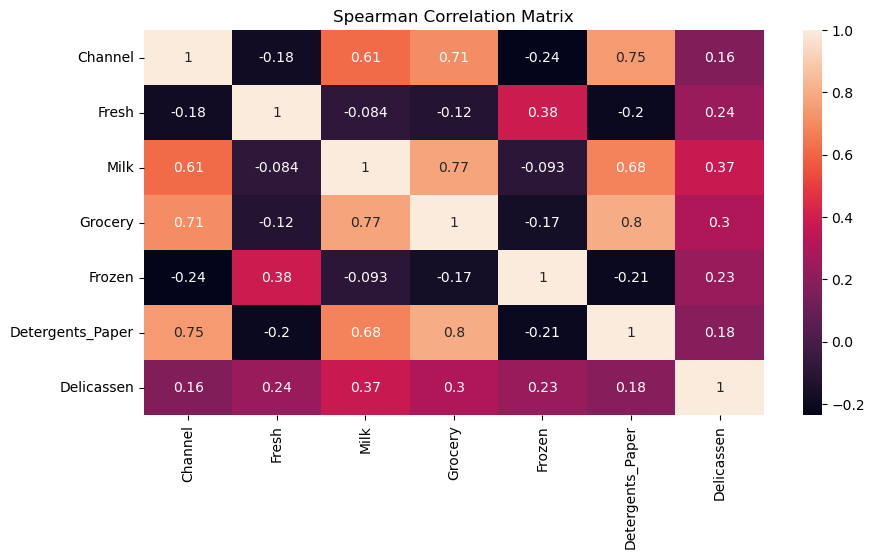

In [9]:
# Confusion Matrix as First Plot
cm = X.corr(method='spearman')

# Define plot
plt.figure(figsize = (10,5))
sns.heatmap(cm, annot=True, cmap = 'rocket')
plt.title('Spearman Correlation Matrix')

# Show
plt.show()

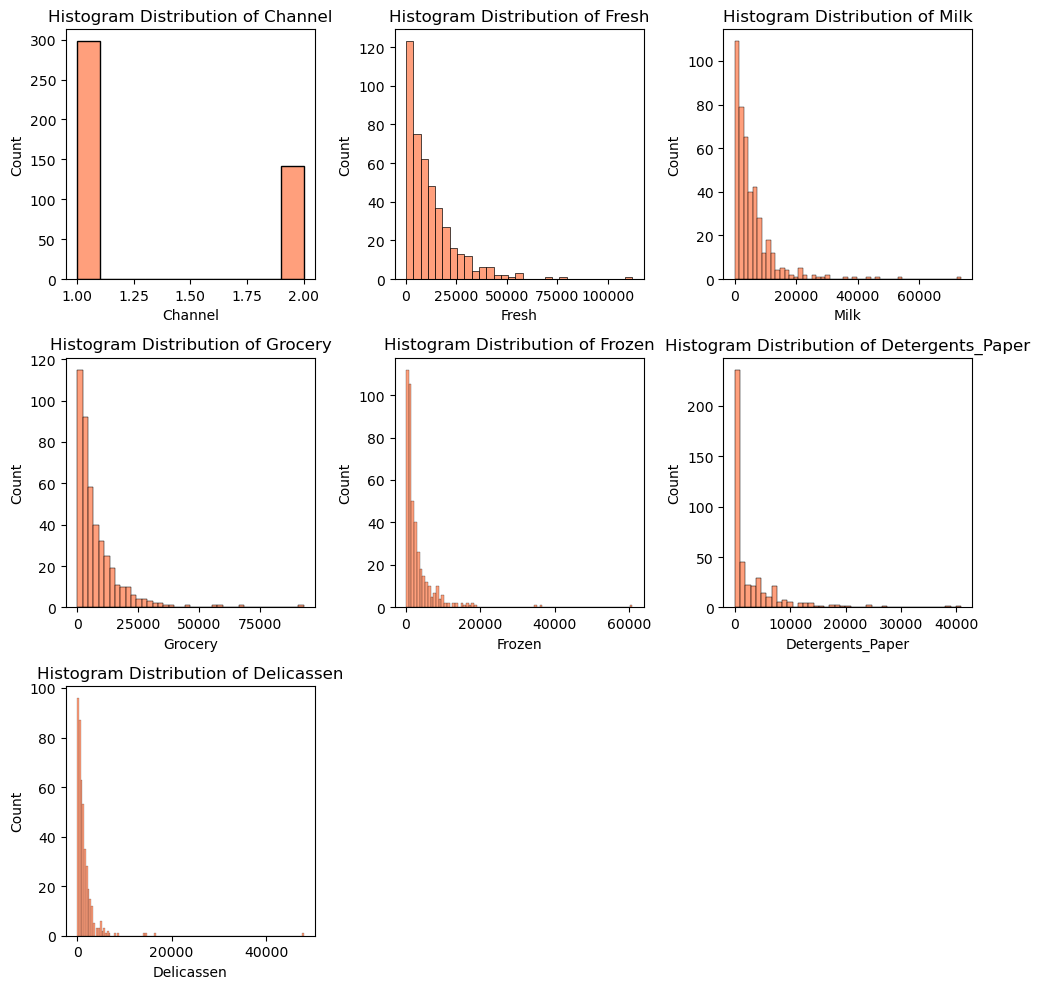

In [10]:
# Histograms Analysis

# Define subplots
fig,axs = plt.subplots(ncols = 3, nrows=3 ,figsize = (10,10))
axs = axs.ravel()

# Loop thorugh features and plot
for i,col in enumerate(X.columns):
    sns.histplot(data = X, x=X[col], ax=axs[i], color = 'coral')
    axs[i].set_title(f'Histogram Distribution of {col}')

# Delete any unsed suplot
for j in range(len(X.columns), len(axs)):
    axs[j].axis('off')

# Show
plt.tight_layout()
plt.show()

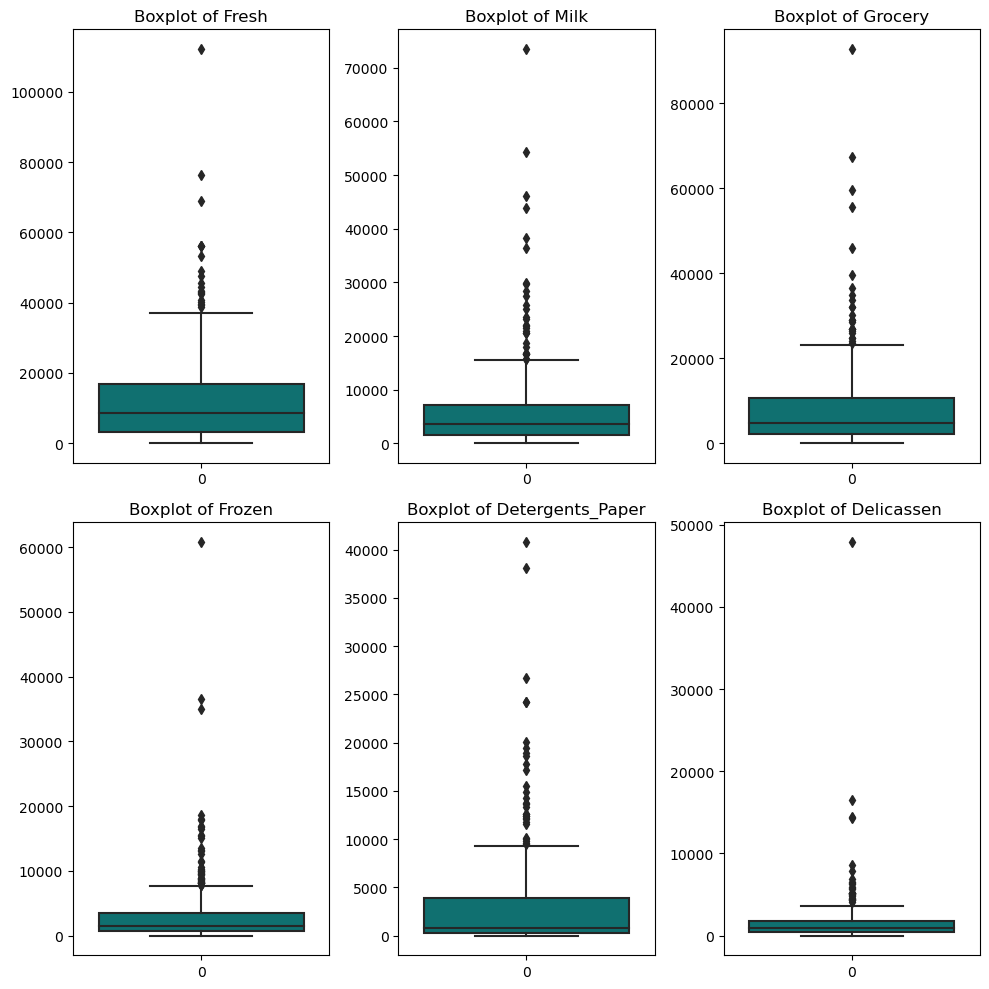

In [11]:
# Boxplots

# Define subplots
fig,axs = plt.subplots(ncols = 3, nrows=2 ,figsize = (10,10))
axs = axs.ravel()

# Loop thorugh features and plot
for i,col in enumerate(X.columns[1:]):
    sns.boxplot(X[col],  ax=axs[i], color = 'teal', orient='v')
    axs[i].set_title(f'Boxplot of {col}')

# Show
plt.tight_layout()
plt.show()

## Conclusion from EDA

### Pairplot:

**Relationships Between Features:**

- Channel vs. Other Features:
    - There is no significant linear relationship visible between `Channel and the other features`. This suggests that the value of Channel does not linearly influence the other features.
    
- Pairs of Continuous Features:

    - There is a noticeable positive correlation between` Grocery and Detergents_Paper`. This indicates that higher spending in Grocery tends to be associated with higher spending in Detergents_Paper.
    - There are some `non-linear relationships` visible among other pairs of features. For example, `Fresh vs. Milk`, `Fresh vs. Grocery`, and `Fresh vs. Detergents_Paper` etc.. show some degree of positive relationship, though not strictly linear.
    - Other pairs, such as `Fresh vs. Frozen`, `Fresh vs. Delicatessen`, and `Frozen vs. Detergents_Paper`, appear more scattered without clear patterns.
    
**Clusters:**
- The data shows potential clustering, particularly in features like Grocery and Detergents_Paper.
    
**Outliers:**
- Several features have outliers, which could impact modeling and may need to be addressed through preprocessing.


### Correlation Heatmap:

**High Positive Correlations:**

`Detergents_Paper and Grocery: Correlation = 0.8`, 
`Grocery and Milk: Correlation = 0.77`, 
`Detergents_Paper and Channel: Correlation = 0.75`
`Grocery and Channel: Correlation = 0.71`

- This features might help in clustering and dimensionality reduction tasks by revealing underlying structures and relationships in the data.

**Low or No Correlation:**

`Fresh vs. Milk: Correlation = -0.084`, indicating little to no monotonic relationship.

### Distribution of Data (Histograms):

The histograms of the features indicate that each feature is right-skewed, confirming our preliminary analysis. This skewness suggests that a majority of the data points are concentrated on the lower end of the scale, with a long tail extending to the right.

### Outliers Analysis (Boxplots):

As anticipated, every feature contains outliers. The boxplots reveal that the highest values are infrequent, contributing to the skewed distribution and the presence of outliers. This indicates that while most data points fall within a lower range, a few extreme values significantly impact the overall distribution.

_______________________

## Data Preprocessing

In [12]:
# Feature Scaling
mms = MinMaxScaler()

X_cleaned = mms.fit_transform(X)

In [13]:
X_cleaned = pd.DataFrame(X_cleaned, columns=X.columns)

# PCA (Principal Component Analysis)

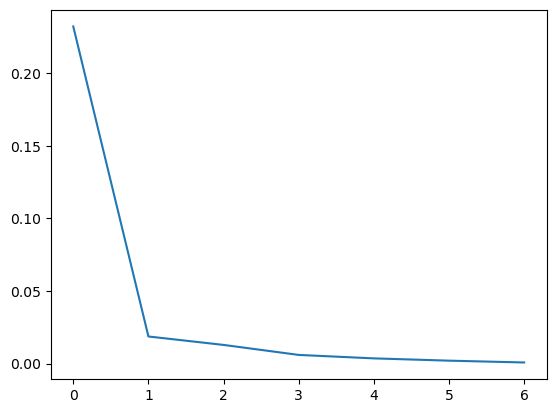

In [14]:
# Define PCA, fit and plot variance to find best components

pca = PCA()

# fit
fitted_data = pca.fit(X_cleaned)

# variance
variance = fitted_data.explained_variance_

# Plot
plt.plot(variance)


In [32]:
# Chossing n_components = 2

# define pca
pca = PCA(n_components=2)

# fit transform
X_pca = pca.fit_transform(X_cleaned)

# to df
X_pca = pd.DataFrame(X_pca, columns=['Dimension1','Dimension2'])

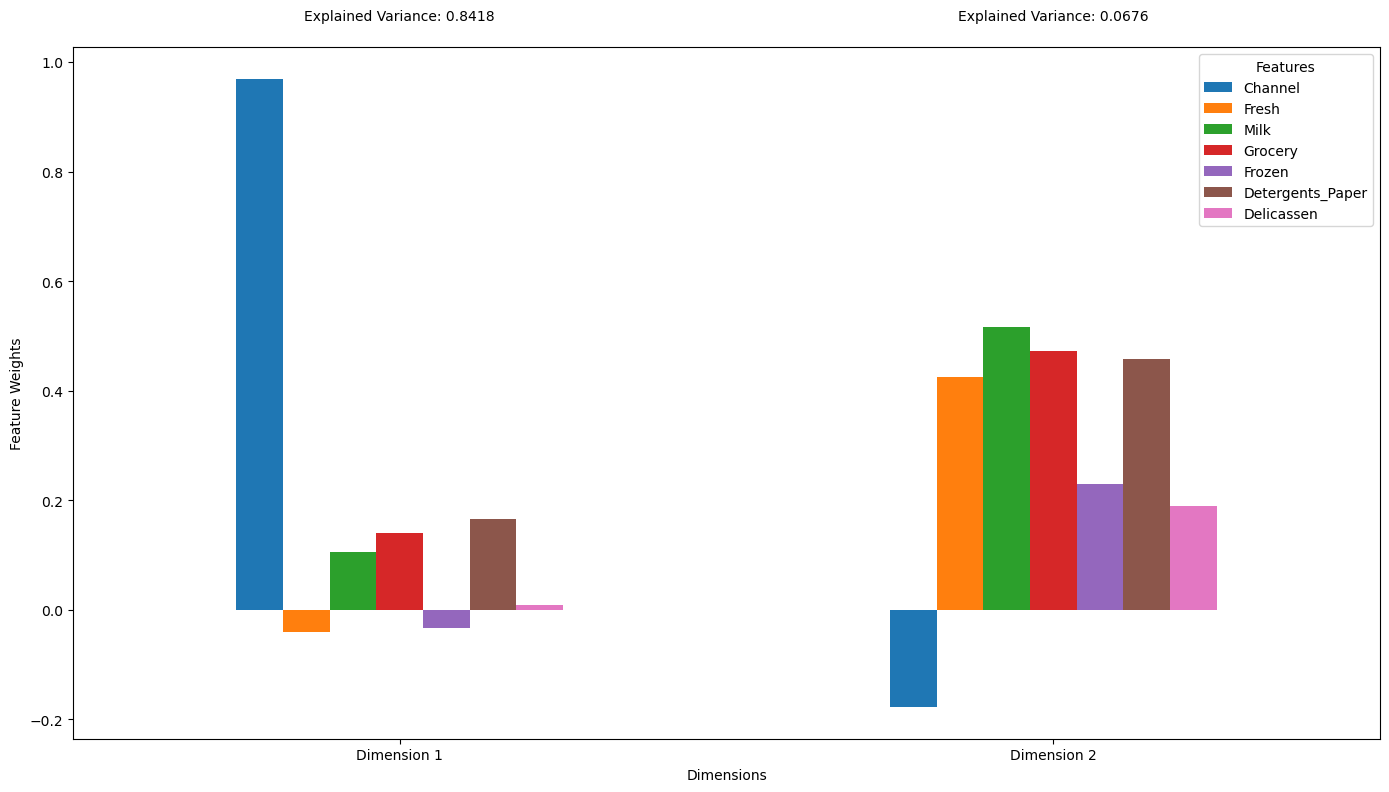

In [33]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_) + 1)]

    # PCA components DataFrame
    components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.columns)
    components.index = dimensions

    # PCA explained variance DataFrame
    variance_ratios = pd.DataFrame(np.round(pca.explained_variance_ratio_, 4), 
                                   columns=['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind='bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xlabel("Dimensions")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend(title='Features')

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i, ax.get_ylim()[1] + 0.05, f"Explained Variance: {ev:.4f}", ha='center')

    plt.tight_layout()  
    plt.show()

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)

pca_results = pca_results(X_cleaned, pca)

### Conclusion from Principal Components Analysis (PCA):

**First Principal Component:**

`Variance Explained: 84.18%`
The first principal component captures a significant portion of the variance in the dataset. The feature weights for the first component are as follows:

- Positive Weights:

    `Channel:` The weight is notably large and positive, indicating that this feature strongly contributes to the positive direction of the first component.
    
    `Detergents_Paper, Grocery and Milk:` These features also have positive weights, though less pronounced, suggesting a moderate contribution to the positive direction.
    
- Negative Weights:

    `Frozen and Fresh:` These features exhibit negative weights, implying they contribute to the opposite direction of the first component.
    
Interpretation: The first principal component seems to differentiate between Channel who spend more on Detergents_Paper, Grocery and Milk versus those who spend less on Frozen and Fresh. This suggests that the component captures a dimension of spending behavior where certain items are strongly associated with higher expenditure, while others are not.

**Second Principal Component:**

`Variance Explained: 6.76%`
The second principal component, while capturing less variance than the first, still provides valuable information. The feature weights for the second component are:

- Positive Weights:

    `Milk:` This feature has a highest positive weight, indicating a significant positive association with the second component.
    
    `Frozen, Delicassen, Fresh, Grocery and Detergents_Paper :` These features also have positive weights.
    
- Negative Weights:

    `Channel:` These feature exhibit negative weights, suggesting an association with the opposite direction of the second component.
    
Interpretation: The second principal component appears to highlight differences in spending patterns related to Fresh, Frozen,  Delicassen versus Detergents_Paper and Grocery. This component might represent a spending behavior that distinguishes between customers who prioritize certain types of products and those who focus on others.

**Total Variance Explained by First Two Components: 90.94%**

# K-Means Clustering

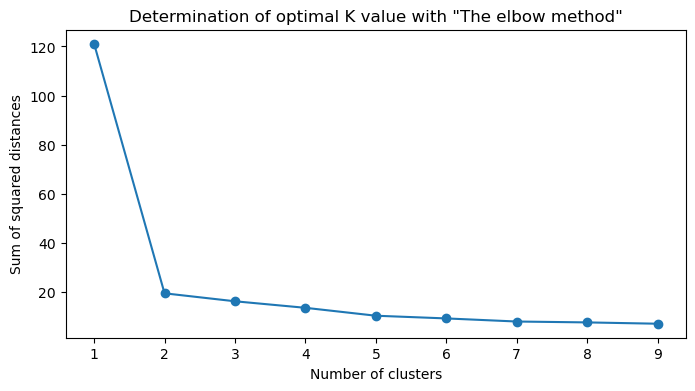

In [34]:
# Lets find out real k value using elbow method

# Define list that will score inertia score
sum_squared_distances = []

# Loop through different ranges for k and score
for i in range(1,10):
    km = KMeans(n_clusters= i)
    km.fit(X_cleaned)
    sum_squared_distances.append(km.inertia_)

# Plot
plt.figure(figsize=(8,4))
plt.plot(range(1,10), sum_squared_distances, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title('Determination of optimal K value with "The elbow method"')
plt.show()

In [35]:
# Function that will evaluate Silhouette score for different parameters 
def sil_eval(model, parameter_grid, df: np.array):
    best_score = -1
    best_grid = None
    n_labs = 0

    for params in tqdm(parameter_grid):
        model.set_params(**params)
        model.fit(df)
        n_unique_labels = len(np.unique(model.labels_))
        if n_unique_labels == 1:
            continue
        current_score = silhouette_score(df, model.labels_)
        if current_score > best_score:
            best_score = current_score
            best_grid = params
            n_labs = n_unique_labels
    return best_score, best_grid, n_labs

In [36]:
# Define Kmeans
model_km = KMeans()

# Define params
parameters = {
    'n_clusters': np.arange(2, 6, 1),
    'random_state': [SEED]
}

# Params grid
parameter_grid1 = ParameterGrid(parameters)

# Call function and score
best_score, best_params, n_labs = sil_eval(model_km, parameter_grid1, X_cleaned) 

print('Best Score:      ', best_score)
print('Best Parameters: ', best_params)
print('Number of Labels:', n_labs)

100%|██████████| 4/4 [00:00<00:00, 46.07it/s]

Best Score:       0.7982253665002286
Best Parameters:  {'n_clusters': 2, 'random_state': 42}
Number of Labels: 2


**As seen from the elbow-method plot, for k=2 we obtained highest silhouette score**

Labels: [0 1]


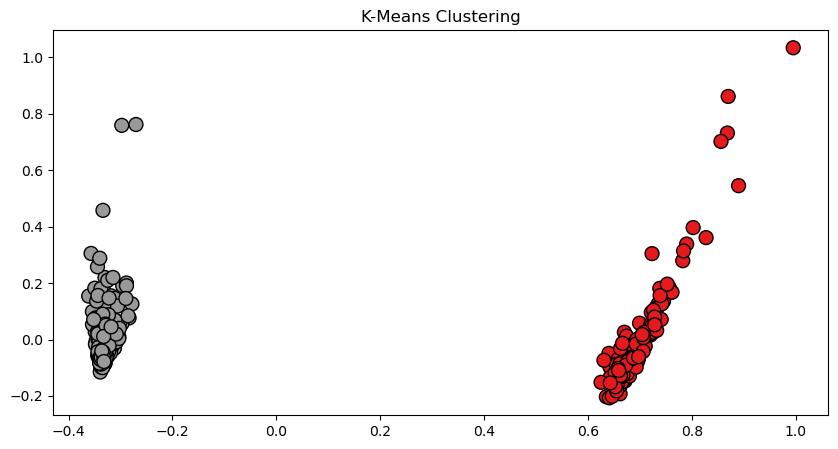

In [37]:
# Best model
model_km.set_params(**best_params)

# Re-fit the model with the best parameters
model_km.fit(X_cleaned)

# Check the labels
labels = model_km.labels_

print('Labels:', np.unique(labels))

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(X_pca['Dimension1'], X_pca['Dimension2'], c=labels, cmap='Set1', edgecolor='k', s=100)
plt.title('K-Means Clustering')
plt.show()

# Agglomerative Clustering

In [38]:
# Define model
model_agg = AgglomerativeClustering()

# Define parameters
agg_parameters = {'n_clusters' : np.arange(2,10,1),
                  'metric' : ['euclidean'],
                  'linkage' : ['ward','complete', 'average', 'single'],
                  'distance_threshold': [None]}

# Define Parameter and score
param_grid2 = ParameterGrid(agg_parameters)
best_score, best_params, n_labs = sil_eval(model_agg, param_grid2, X_cleaned)

print('Best Score:      ', best_score)
print('Best Parameters: ', best_params)
print('Number of Labels:', n_labs)


100%|██████████| 32/32 [00:00<00:00, 60.11it/s]

Best Score:       0.7987704509001244
Best Parameters:  {'distance_threshold': None, 'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 3}
Number of Labels: 3


Labels: [0 1 2]


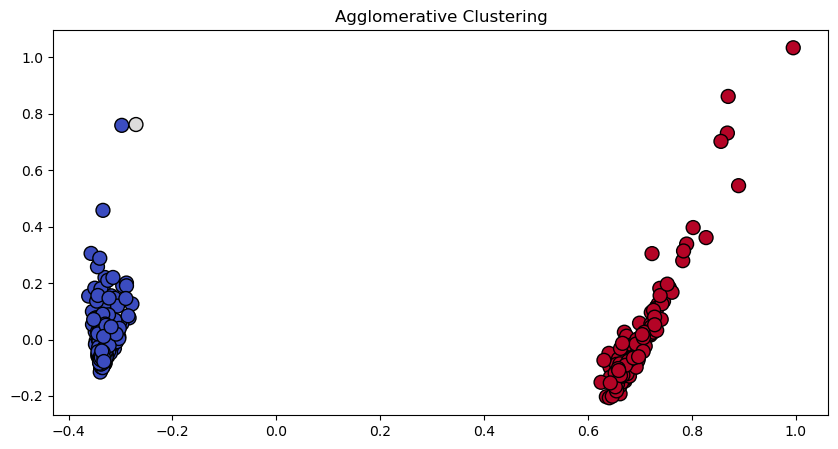

In [43]:
# Best model
model_agg.set_params(**best_params)

# Re-fit the model with the best parameters
model_agg.fit(X_cleaned)

# Check the labels
labels_agg = model_agg.labels_

print('Labels:', np.unique(labels_agg))

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(X_pca['Dimension1'], X_pca['Dimension2'], c=labels_agg, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Agglomerative Clustering')
plt.show()

In [59]:
print('Count of Label 0:', len(labels_agg[labels_agg == 0]))
print('Count of Label 1:', len(labels_agg[labels_agg == 1]))
print('Count of Label 2:', len(labels_agg[labels_agg == 2]))

Count of Label 0: 297
Count of Label 1: 1
Count of Label 2: 142


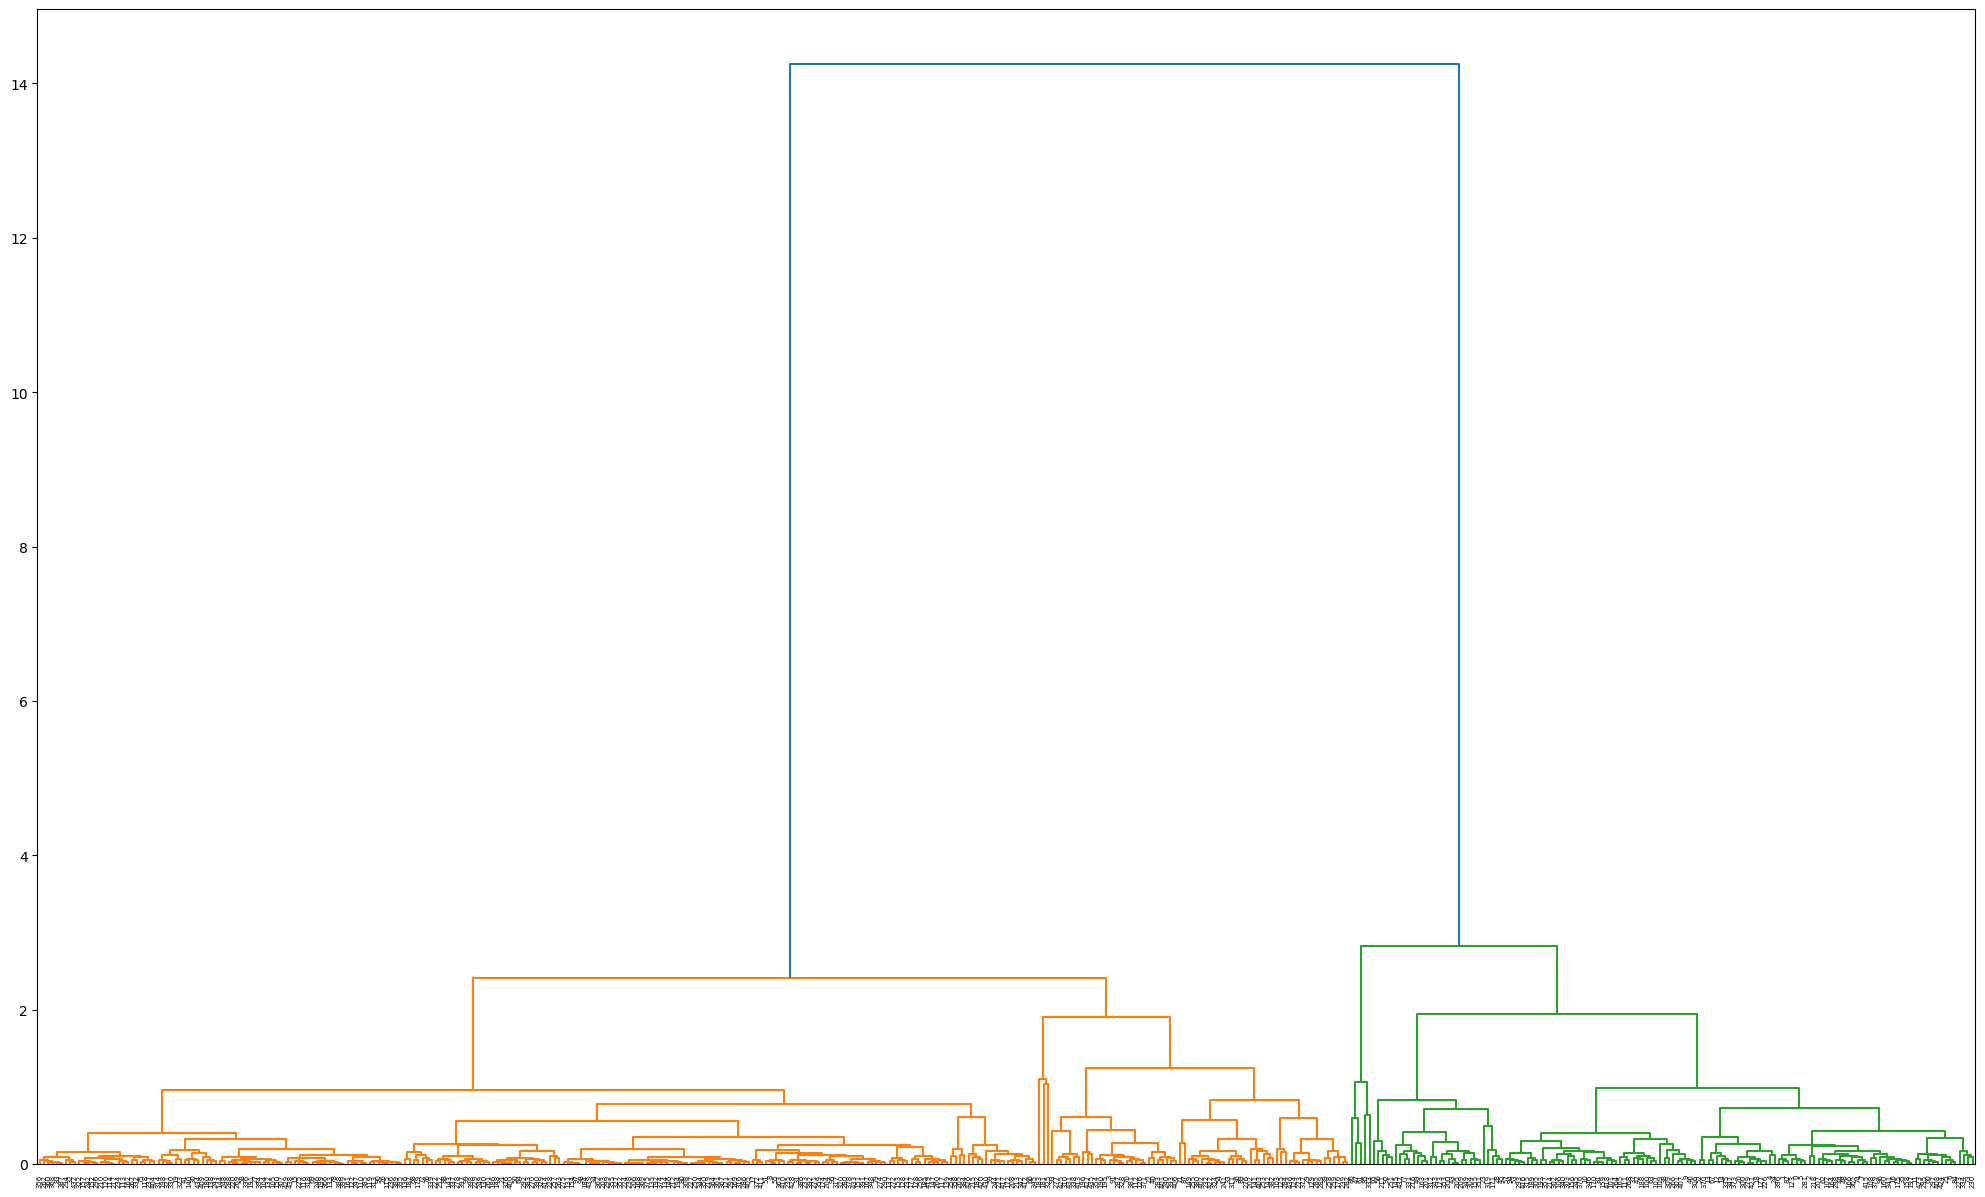

In [42]:
# Dendogram Plot
output = linkage(X_cleaned, 'ward')

fig = plt.figure(figsize=(25,15))
dendrogram(output)
plt.show()

# DBScan

In [44]:
db_model = DBSCAN(n_jobs=-1)

db_params = {'eps' : np.arange(0.1,1,0.1),
             'min_samples': np.arange(1,10,1)}

# Define Parameter and score
param_grid3 = ParameterGrid(db_params)
best_score, best_params, n_labs = sil_eval(db_model, param_grid3, X_cleaned)

print('Best Score:      ', best_score)
print('Best Parameters: ', best_params)
print('Number of Labels:', n_labs)


100%|██████████| 81/81 [00:01<00:00, 41.11it/s]

Best Score:       0.8003279411489277
Best Parameters:  {'eps': 0.5, 'min_samples': 2}
Number of Labels: 3


Labels: [-1  0  1]


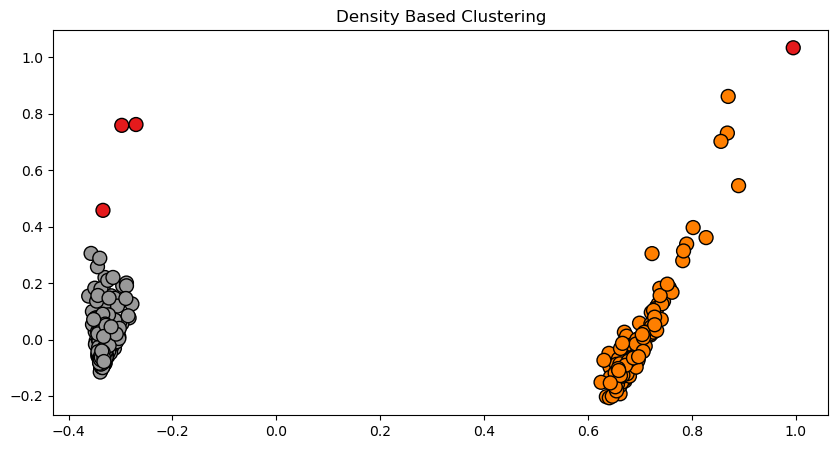

In [45]:
# Best model
db_model.set_params(**best_params)

# Re-fit the model with the best parameters
db_model.fit(X_cleaned)

# Check the labels
labels_db = db_model.labels_

print('Labels:', np.unique(labels_db))

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(X_pca['Dimension1'], X_pca['Dimension2'], c=labels_db, cmap='Set1', edgecolor='k', s=100)
plt.title('Density Based Clustering')
plt.show()

In [61]:
print('Count of Label 0:', len(labels_db[labels_db == 0]))
print('Count of Label 1:', len(labels_db[labels_db == 1]))
print('Count of Label 2:', len(labels_db[labels_db == -1]))

Count of Label 0: 141
Count of Label 1: 295
Count of Label 2: 4


# Results

For each model, hyperparameter optimization was performed using a self-defined function that calculates the silhouette score. Based on the highest score, the function returns the best parameters, the number of labels, and the score.

### K-Means Clustering

| Results          |                     |
|------------------|---------------------|
| Best Score       | 0.7982              |            
| Best Parameters  | {'n_clusters': 2, 'random_state': 42} |
| Number of Labels | 2                   |

- The K-Means algorithm produced 2 clusters with a silhouette score of 0.7982. This suggests that the clustering is reasonably well-separated and the clusters are well-formed.

### Agglomerative Clustering

| Results          |                     |
|------------------|---------------------|
| Best Score       |0.7987               |
| Best Parameters  | {'distance_threshold': None, 'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 3} |
| Number of Labels | 3                  |

- Agglomerative Clustering resulted in 3 clusters with a silhouette score of 0.7987. However, an examination of the value counts and the corresponding plot reveals that only one point is labeled with cluster 1, which might indicate an outlier. The dendrogram shows that the data can be clearly separated into 2 distinct classes, suggesting that 2 clusters might be more appropriate for this dataset.


## DBScan

| Results          |                     |
|------------------|---------------------|
| Best Score       |  0.8003             |
| Best Parameters  | {'eps': 0.5, 'min_samples': 2} |
| Number of Labels | 3                |

- The DBScan algorithm identified 3 clusters with a silhouette score of 0.8003. Additionally, the plot and value counts reveal that 4 points are labeled as -1, which indicates that they are considered outliers by the DBScan algorithm.

# Final Conclusion

The evaluation of clustering algorithms: K-Means, Agglomerative Clustering, and DBScan, shows generally good performance, with silhouette scores indicating well-separated clusters. However, each algorithm's results suggest different interpretations of the data structure:


In conclusion, while all three algorithms provide valuable insights, the silhouette scores suggest that the clustering is reasonably effective. The choice of the number of clusters might vary depending on the algorithm used. Agglomerative Clustering and DBScan provide additional information about potential outliers, which should be considered when interpreting the results.
Further investigation and label mapping are needed to fully understand the alignment between true and predicted clusters.